# Unzipping the Type 1, Type 2 and the Test-Set Files

In [75]:
!unzip 'Type1.zip'

Archive:  Type1.zip
replace Type1/AIbTGVEOXD.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: Type1/AIbTGVEOXD.png    
 extracting: Type1/AJvZmOPoHn.png    
 extracting: Type1/AKiRJnqaBv.png    
 extracting: Type1/ALbdsjAqlL.png    
 extracting: Type1/APxEmUZezH.png    
 extracting: Type1/AQWnTSXhDB.png    
 extracting: Type1/ARrMhUxWlp.png    
 extracting: Type1/ATrHcuYIrv.png    
 extracting: Type1/AboisFcjDw.png    
 extracting: Type1/AbsPItfJjd.png    
 extracting: Type1/AiZfMnFPJL.png    
 extracting: Type1/AozwppXceC.png    
 extracting: Type1/AqRCfFEtGP.png    
 extracting: Type1/AsKTzXulth.png    
 extracting: Type1/AuUsiRaXOu.png    
 extracting: Type1/AvrVfTSIuo.png    
 extracting: Type1/AvuQaDeEeL.png    
 extracting: Type1/AxatxEKCdH.png    
 extracting: Type1/AyfLNSyDZH.png    
 extracting: Type1/AyxJLMcDeF.png    
 extracting: Type1/BEdOIggqcW.png    
 extracting: Type1/BIDqomEVJS.png    
 extracting: Type1/BJqEaLciRO.png    
 extracting: Type1/BWVKGBTiOL.png   

In [76]:
!unzip 'Type2.zip'

Archive:  Type2.zip
replace Type2/AJojKLRknC.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: Type2/AJojKLRknC.png    
 extracting: Type2/ALFReKopfp.png    
 extracting: Type2/AMSvBOjUOx.png    
 extracting: Type2/AQIgSTUTfN.png    
 extracting: Type2/ASPVXqWDdv.png    
 extracting: Type2/AUoOEwVXZO.png    
 extracting: Type2/AYzxGpPxey.png    
 extracting: Type2/AaHpuQYvmO.png    
 extracting: Type2/AfnSwVDnuA.png    
 extracting: Type2/AibzLcAdSr.png    
 extracting: Type2/AjMYVzQzoL.png    
 extracting: Type2/AlbMvGiuAU.png    
 extracting: Type2/AltHvUhTaN.png    
 extracting: Type2/AplfwCHDIp.png    
 extracting: Type2/AzWpmiazWi.png    
 extracting: Type2/AzjxegsveW.png    
 extracting: Type2/BDheMVIcNz.png    
 extracting: Type2/BDpJkYhJHC.png    
 extracting: Type2/BDtFjeTZnR.png    
 extracting: Type2/BDxUCoavMy.png    
 extracting: Type2/BEcdrFWQLf.png    
 extracting: Type2/BFSgKMqCqX.png    
 extracting: Type2/BHRccqiDjS.png    
 extracting: Type2/BIVkwgByBm.png   

In [77]:
!unzip 'TestSet.zip'

Archive:  TestSet.zip
replace TestSet/Test_0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: TestSet/Test_0.png      
 extracting: TestSet/Test_1.png      
 extracting: TestSet/Test_10.png     
 extracting: TestSet/Test_11.png     
 extracting: TestSet/Test_12.png     
 extracting: TestSet/Test_13.png     
 extracting: TestSet/Test_14.png     
 extracting: TestSet/Test_15.png     
 extracting: TestSet/Test_16.png     
 extracting: TestSet/Test_17.png     
 extracting: TestSet/Test_18.png     
 extracting: TestSet/Test_19.png     
 extracting: TestSet/Test_2.png      
 extracting: TestSet/Test_3.png      
 extracting: TestSet/Test_4.png      
 extracting: TestSet/Test_5.png      
 extracting: TestSet/Test_6.png      
 extracting: TestSet/Test_7.png      
 extracting: TestSet/Test_8.png      
 extracting: TestSet/Test_9.png      


# Importing the libraries

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import cv2

# Creating a function to filter the images and preprocess them

In [126]:
from os import listdir
from PIL import Image as PImage

def loadImagescv(path):
    # return array of images
    imagesList = listdir(path)
    #imagesList.sort()
    lower_range = np.array([0,0,0])  # Set the Lower range value of color in BGR
    upper_range = np.array([255,40,0])
    loadedImages = []
    for image in imagesList:
      img = cv2.imread(path + image)
      mask = cv2.inRange(img,lower_range,upper_range) # Create a mask with range
      result = cv2.bitwise_and(img,img,mask = mask)
      grey = cv2.cvtColor(result,cv2.COLOR_RGB2GRAY)
      loadedImages.append(grey[100:300,100:300]/255)
    return loadedImages
    
path1 = "/content/Type1/"
path2 = "/content/Type2/"
# images in an array
type1 = loadImagescv(path1)
type2 = loadImagescv(path2)


In [127]:
def getnonzero(matrix):     # Function to find the number of zeros in a matrix
  c=0
  for i in range(0,5):
    for j in range(0,5):
      if(matrix[i, j]!=0):
        c+=1
  return c 

In [128]:
copy = np.copy(type1)
t1=copy
copy = np.copy(type2)
t2=copy

# Creating the arrays containing position of the particles in the images

In [129]:
P=[]
for k in range(1000):
  image=t1[k]
  for i in range(0,196,5):
    for j in range(0,196,5):
      img = image[i:i+5,j:j+5]
      c = getnonzero(img)
      if(c>0):
        P.append([i, j])
        for p in range(0,8):
          for q in range(0,8):
            image[i+p][j+q]=0

In [130]:
Q=[]
for k in range(1000):
  image=t2[k]
  for i in range(0,196,5):
    for j in range(0,196,5):
      img = image[i:i+5,j:j+5]
      c = getnonzero(img)
      if(c>0):
        Q.append([i, j])
        for p in range(0,8):
          for q in range(0,8):
            image[i+p][j+q]=0


In [131]:
print(len(P))
print(len(Q))

5112
2045


# Creating the dataset and shuffling them

In [132]:
X=np.empty([7157,2])
y=np.empty([7157,])
for i in range (5112):
  val=P[i]
  X[i]=val
  y[i]=0
for i in range (2045):
  val=Q[i]
  X[i+5112]=val
  y[i+5112]=1

In [133]:
import random
for i in range(7157):
  # Pick a random index from 0 to i
  j = random.randint(0, 7156)
  # Swap arr[i] with the element at random index
  temp1=X[i,:]
  temp2=y[i]
  X[i,:]=X[j,:]
  y[i]=y[j]
  X[j,:]=temp1
  y[j]=temp2

In [134]:
from sklearn.model_selection import train_test_split        # splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 1) #randomly 25%

# Creating, compiling and training the Neural Network Model

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras import layers, callbacks

model1=Sequential([
    Dense(256, activation='relu' , input_shape=(2,)),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

In [162]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 256)               768       
                                                                 
 batch_normalization_35 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_43 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_36 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_44 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_37 (Bat  (None, 128)             

In [163]:
history = model1.fit(X_train, y_train, batch_size=32, validation_data = (X_val,y_val), epochs=100)

Epoch 1/100
168/168 [==============================] - 2s 6ms/step - loss: 0.6046 - accuracy: 0.6846 - val_loss: 0.5943 - val_accuracy: 0.7117
Epoch 2/100
168/168 [==============================] - 1s 4ms/step - loss: 0.5581 - accuracy: 0.7162 - val_loss: 0.5727 - val_accuracy: 0.7073
Epoch 3/100
168/168 [==============================] - 1s 5ms/step - loss: 0.5575 - accuracy: 0.7134 - val_loss: 0.5708 - val_accuracy: 0.7128
Epoch 4/100
168/168 [==============================] - 1s 5ms/step - loss: 0.5553 - accuracy: 0.7106 - val_loss: 0.5663 - val_accuracy: 0.6939
Epoch 5/100
168/168 [==============================] - 1s 5ms/step - loss: 0.5517 - accuracy: 0.7149 - val_loss: 0.5566 - val_accuracy: 0.7134
Epoch 6/100
168/168 [==============================] - 1s 4ms/step - loss: 0.5478 - accuracy: 0.7205 - val_loss: 0.5498 - val_accuracy: 0.7073
Epoch 7/100
168/168 [==============================] - 1s 4ms/step - loss: 0.5518 - accuracy: 0.7127 - val_loss: 0.5548 - val_accuracy: 0.7112

Minimum validation loss: 0.5381709337234497


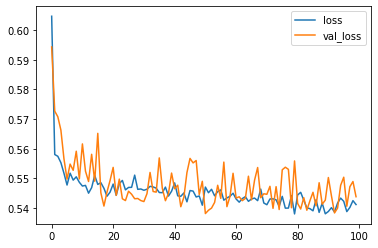

In [164]:
# Plotting the loss v/s epoch graph
history_df = pd.DataFrame(history.history)            
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [165]:
model1.evaluate(X_val,y_val)

56/56 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7095


[0.5438458323478699, 0.7094972133636475]

# Evaluating the neural network model

In [166]:
y_pred = model1.predict(X_val)
length=len(y_pred)
for i in range(length):
  if(y_pred[i][0]>0.35):
    y_pred[i][0]=1
  else:
    y_pred[i][0]=0
y_pred=np.reshape(y_pred,(length,))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)                               # Confusion matrix

56/56 [==============================] - 0s 2ms/step
[[947 333]
 [208 302]]


In [167]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
print(accuracy_score(y_val, y_pred))
print(f1_score(y_val, y_pred))
print(precision_score(y_val, y_pred))
print(recall_score(y_val, y_pred))

0.6977653631284916
0.5275109170305676
0.4755905511811024
0.592156862745098


# Logistic Regression

In [95]:
# Training the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Evaluation of the model
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)
from sklearn.metrics import f1_score, precision_score, recall_score
print(accuracy_score(y_val, y_pred))
print(f1_score(y_val, y_pred))
print(precision_score(y_val, y_pred))
print(recall_score(y_val, y_pred))

[[1306    0]
 [ 484    0]]
0.729608938547486
0.0
0.0
0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [96]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Evaluation of the model
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)
from sklearn.metrics import f1_score, precision_score, recall_score
print(accuracy_score(y_val, y_pred))
print(f1_score(y_val, y_pred))
print(precision_score(y_val, y_pred))
print(recall_score(y_val, y_pred))

[[1189  117]
 [ 401   83]]
0.7106145251396648
0.2426900584795322
0.415
0.17148760330578514


# Random Forest Algorithms

In [97]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Evaluation of the model
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)
from sklearn.metrics import f1_score, precision_score, recall_score
print(accuracy_score(y_val, y_pred))
print(f1_score(y_val, y_pred))
print(precision_score(y_val, y_pred))
print(recall_score(y_val, y_pred))

[[1171  135]
 [ 373  111]]
0.7162011173184357
0.3041095890410959
0.45121951219512196
0.22933884297520662


# Kernel SVM

In [98]:
# Training the model
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Evaluation of the model
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)
from sklearn.metrics import f1_score, precision_score, recall_score
print(accuracy_score(y_val, y_pred))
print(f1_score(y_val, y_pred))
print(precision_score(y_val, y_pred))
print(recall_score(y_val, y_pred))

[[1306    0]
 [ 484    0]]
0.729608938547486
0.0
0.0
0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-Nearest Neighbor

In [99]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Evaluation of the model
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)
from sklearn.metrics import f1_score, precision_score, recall_score
print(accuracy_score(y_val, y_pred))
print(f1_score(y_val, y_pred))
print(precision_score(y_val, y_pred))
print(recall_score(y_val, y_pred))

[[1212   94]
 [ 410   74]]
0.7184357541899441
0.2269938650306748
0.44047619047619047
0.15289256198347106


# Naive Bayes

In [100]:
# Training the model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Evaluation of the model
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)
from sklearn.metrics import f1_score, precision_score, recall_score
print(accuracy_score(y_val, y_pred))
print(f1_score(y_val, y_pred))
print(precision_score(y_val, y_pred))
print(recall_score(y_val, y_pred))

[[1269   37]
 [ 455   29]]
0.7251396648044692
0.10545454545454545
0.4393939393939394
0.05991735537190083


# XGBoost

In [101]:
# Training the model
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Evaluation of the model
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)
from sklearn.metrics import f1_score, precision_score, recall_score
print(accuracy_score(y_val, y_pred))
print(f1_score(y_val, y_pred))
print(precision_score(y_val, y_pred))
print(recall_score(y_val, y_pred))

[[1204  102]
 [ 413   71]]
0.7122905027932961
0.21613394216133944
0.41040462427745666
0.14669421487603307


## From all these models, we can see that the Neural Network is the best model to work with as it has the highest F1 score than any other model.
## So we will use the NN to predict the output

# Creating a function to load the test images

In [102]:
def loadtest(path):
    # return array of images
    imagesList = listdir(path)
    imagesList.sort()
    loadedImages = []
    for image in imagesList:
      img = cv2.imread(path + image)
      newimg = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
      loadedImages.append(newimg[100:300,100:300])
    return loadedImages
    
path = "/content/TestSet/"
# images in an array
test = loadtest(path)

In [103]:
path = '/content/TestSet/'
type3 = loadImagescv(path)

In [104]:
copy = np.copy(type3)
t3=copy

#Predicting output of each image and drawing rectangles around the particles in it.

In [105]:
for k in range(20):
  R=[]
  image=t3[k]
  for i in range(0,196,5):
    for j in range(0,196,5):
      img = image[i:i+5,j:j+5]
      c = getnonzero(img)
      if(c>0):
        R.append([i, j])
        for p in range(0,8):
          for q in range(0,8):
            image[i+p][j+q]=0      # Clearing the 7X7 grid of the image so that repitition does not happen
  y_pred=model1.predict(R)        # Prediction for an image
  for i in range(y_pred.shape[0]):
    # Thresholding the prediction output
    if(y_pred[i][0]>0.35):
      y_pred[i][0]=1
    else:
      y_pred[i][0]=0
  for i in range(y_pred.shape[0]):
    if(y_pred[i][0]==1):
      cv2.rectangle(test[k],(R[i][1],R[i][0]),(R[i][1]+10,R[i][0]+10),(255,0,0),1)    # Drawing red circle for type 2
    else:
      cv2.rectangle(test[k],(R[i][1],R[i][0]),(R[i][1]+10,R[i][0]+10),(0,255,0),1)    # Drawing green circle for type 1

1/1 [==============================] - 0s 33ms/step


# Plotting all the images on the same frame

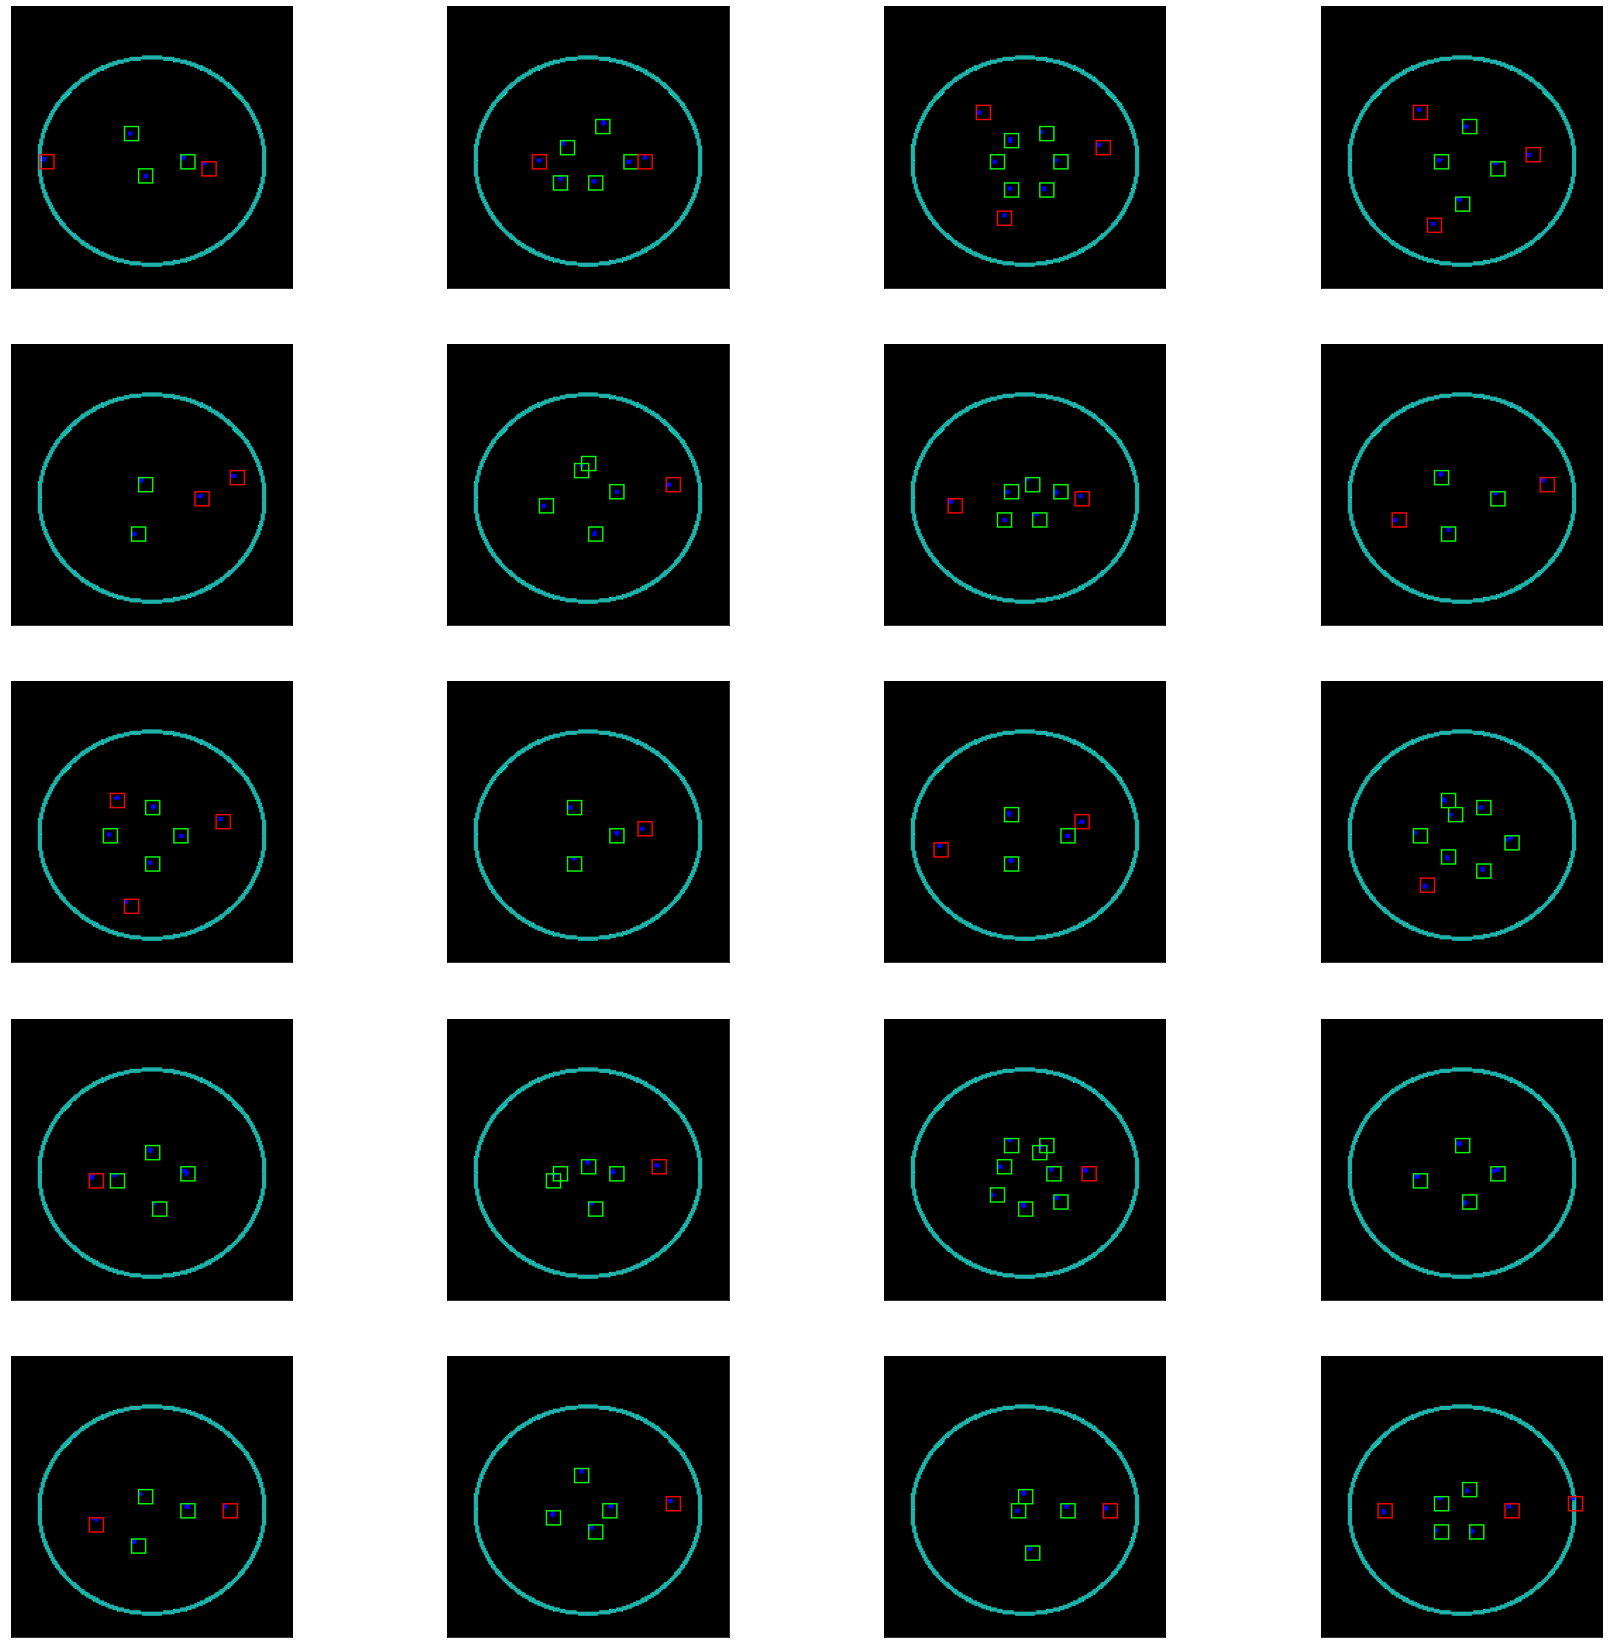

In [106]:
plt.figure(figsize=(30,30))
for i in range(20):
  plt.subplot(5,4,i+1)    # 4 images in one row
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test[i])
plt.show()

# Creating the new images and then saving it in the zip file

In [107]:
for i in range(20):
  if(i==0 or i==1):
    s='/content/Output_Images/Test_'+str(i)+'.png'
    img = cv2.cvtColor(test[i],cv2.COLOR_RGB2BGR)
  elif(i>=2 and i<=11):
    s='/content/Output_Images/Test_'+str(i+8)+'.png'
    img = cv2.cvtColor(test[i],cv2.COLOR_RGB2BGR)
  else:
    s='/content/Output_Images/Test_'+str(i-10)+'.png'
    img = cv2.cvtColor(test[i],cv2.COLOR_RGB2BGR)
  cv2.imwrite(s,img)

In [108]:
import shutil
output_filename = 'Output_Images'
input_dir = '/content/Output_Images'
shutil.make_archive(output_filename, 'zip', input_dir)

'/content/Output_Images.zip'